In [1]:
import numpy as np
import pandas as pd
import os
import PIL
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib.pyplot import imshow
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [2]:
summ = pd.read_csv('Chest_xray_Corona_dataset_Summary.csv')
meta = pd.read_csv('Chest_xray_Corona_Metadata.csv')
#null데이터 0으로 만들어줌
meta.fillna('0', inplace = True)
meta.isnull().sum()

print(meta)

#test와 train 데이터 나눔
train_data = meta[meta['Dataset_type']=='TRAIN']
test_data = meta[meta['Dataset_type']=='TEST']

#test, train 나눈 데이터 새로운 csv에 저장
#train_data.to_csv('train_data_corona.csv')
#test_data.to_csv('test_data_corona.csv')

      Unnamed: 0            X_ray_image_name     Label Dataset_type  \
0              0           IM-0128-0001.jpeg    Normal        TRAIN   
1              1           IM-0127-0001.jpeg    Normal        TRAIN   
2              2           IM-0125-0001.jpeg    Normal        TRAIN   
3              3           IM-0122-0001.jpeg    Normal        TRAIN   
4              4           IM-0119-0001.jpeg    Normal        TRAIN   
...          ...                         ...       ...          ...   
5905        5928  person1637_virus_2834.jpeg  Pnemonia         TEST   
5906        5929  person1635_virus_2831.jpeg  Pnemonia         TEST   
5907        5930  person1634_virus_2830.jpeg  Pnemonia         TEST   
5908        5931  person1633_virus_2829.jpeg  Pnemonia         TEST   
5909        5932  person1632_virus_2827.jpeg  Pnemonia         TEST   

     Label_2_Virus_category Label_1_Virus_category  
0                         0                      0  
1                         0              

In [3]:
train_df=pd.read_csv('train_data_corona.csv')
test_df=pd.read_csv('test_data_corona.csv')

In [4]:
train_df.head()

,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category
0,IM-0128-0001.jpeg,Normal,TRAIN,0,0
1,IM-0127-0001.jpeg,Normal,TRAIN,0,0
2,IM-0125-0001.jpeg,Normal,TRAIN,0,0
3,IM-0122-0001.jpeg,Normal,TRAIN,0,0
4,IM-0119-0001.jpeg,Normal,TRAIN,0,0


In [5]:
test_df.head()

,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category
0,IM-0021-0001.jpeg,Normal,TEST,0,0
1,IM-0019-0001.jpeg,Normal,TEST,0,0
2,IM-0017-0001.jpeg,Normal,TEST,0,0
3,IM-0016-0001.jpeg,Normal,TEST,0,0
4,IM-0015-0001.jpeg,Normal,TEST,0,0


In [6]:
#x-ray 이미지 데이터 불러오기
train_img='./Coronahack-Chest-XRay-Dataset/train'
test_img='./Coronahack-Chest-XRay-Dataset/test'

In [7]:
#폐렴과 일반데이터 확인
train_df['Label'].value_counts()

Pnemonia    3944
Normal      1342
Name: Label, dtype: int64

In [8]:
#사진의 병명,수 확인
train_df['Label_2_Virus_category'].value_counts()

0                5217
COVID-19           58
Streptococcus       5
SARS                4
ARDS                2
Name: Label_2_Virus_category, dtype: int64

In [9]:
Pneumonia  = train_df[train_df['Label']=='Pnemonia']  
Normal = train_df[train_df['Label']=='Normal']

print('covid19 shape: ',Pneumonia.shape)
print('covid19 shape: ',Normal.shape)

covid19 shape:  (3944, 5)
covid19 shape:  (1342, 5)


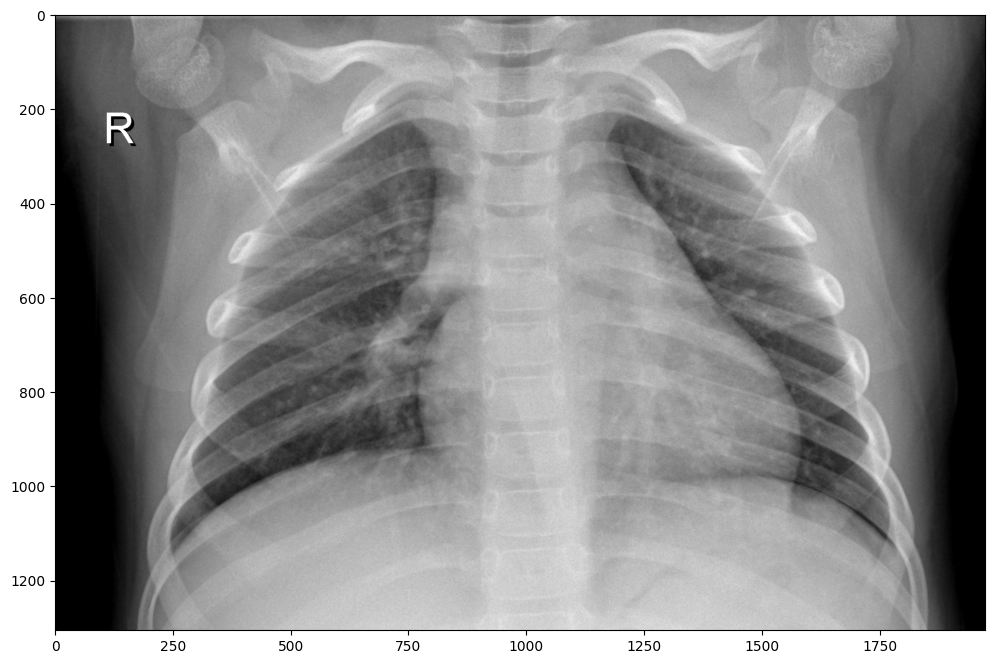

In [10]:
#정상환자 X-ray
plt.figure(figsize=(12,12))
Nor_sample = Image.open(os.path.join(train_img, Normal['X_ray_image_name'].iloc[1]))
plt.imshow(Nor_sample, cmap='gray')

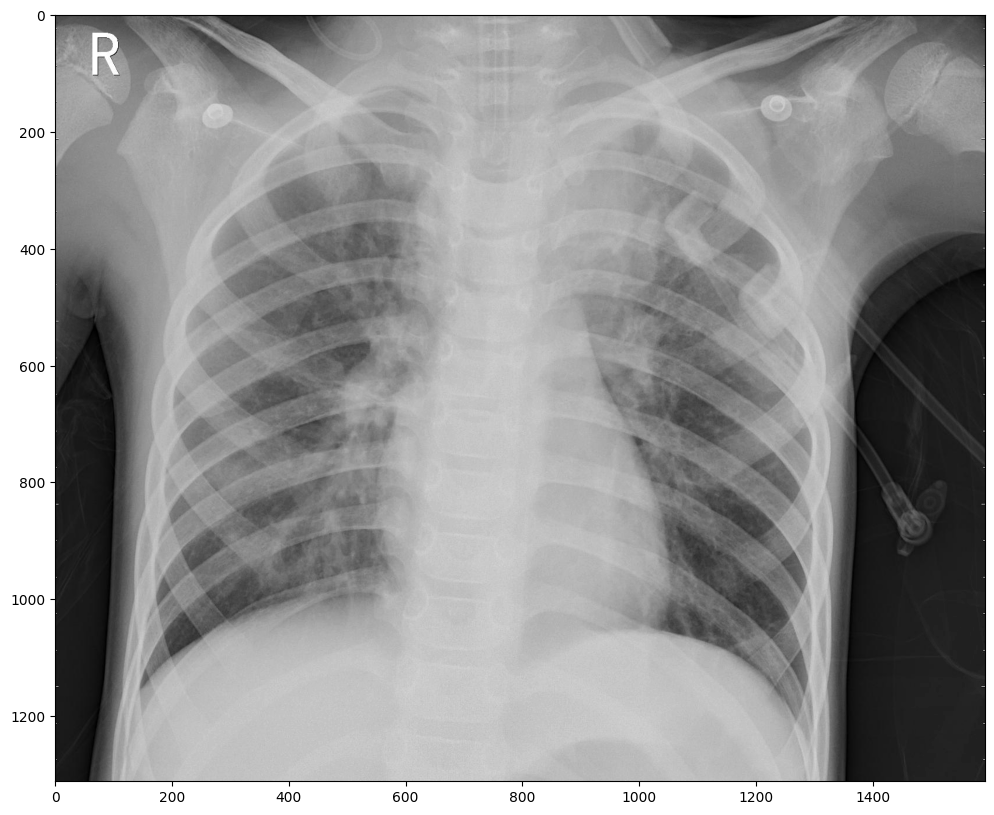

In [11]:
#폐렴환자 X-ray
plt.figure(figsize=(12,12))
Pne_sample = Image.open(os.path.join(train_img, Pneumonia['X_ray_image_name'].iloc[1]))
plt.imshow(Pne_sample, cmap='gray')

In [12]:
train_df, valid_df = train_test_split(train_df, train_size=0.8, random_state=0)

In [13]:
print('Train Value: ',train_df['Label'].value_counts())
print('\nValidation Value: ',valid_df['Label'].value_counts())
print('\nTest Value: ',test_df['Label'].value_counts())

Train Value:  Pnemonia    3167
Normal      1061
Name: Label, dtype: int64

Validation Value:  Pnemonia    777
Normal      281
Name: Label, dtype: int64

Test Value:  Pnemonia    390
Normal      234
Name: Label, dtype: int64


In [14]:
train_datagen = ImageDataGenerator(rescale = 1/255,rotation_range = 30, width_shift_range = 0.2, height_shift_range = 0.2, 
                                   shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True, vertical_flip =True)
test_datagen = ImageDataGenerator(rescale = 1/255)

In [16]:
train_gen = train_datagen.flow_from_dataframe(dataframe = train_df, directory=train_img, x_col='X_ray_image_name', 
                                              y_col='Label', target_size=(224,224), batch_size=64, 
                                               class_mode='binary')
valid_gen = test_datagen.flow_from_dataframe(dataframe = valid_df, directory=train_img, x_col='X_ray_image_name',
                                             y_col='Label', target_size=(224,224), batch_size=64, 
                                            class_mode='binary')
test_gen = test_datagen.flow_from_dataframe(dataframe = test_df, directory=test_img, x_col='X_ray_image_name', 
                                            y_col='Label', target_size=(224,224), batch_size=64,
                                             class_mode='binary')

Found 4228 validated image filenames belonging to 2 classes.
Found 1058 validated image filenames belonging to 2 classes.
Found 624 validated image filenames belonging to 2 classes.


In [17]:
Resnet_model = tf.keras.applications.ResNet50V2(weights='imagenet', input_shape = (224,224,3),
                                                     include_top=False)
for layer in Resnet_model.layers:
    layer.trainable = False

Metal device set to: Apple M1


2022-09-22 11:30:07.667717: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-09-22 11:30:07.668205: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [25]:
model = tf.keras.Sequential([
    Resnet_model, 
    tf.keras.layers.GlobalAveragePooling2D(), 
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(), 
    tf.keras.layers.Dropout(0.2), 
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [26]:
model.compile(optimizer = keras.optimizers.Adam(learning_rate=0.001),
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

In [32]:
MODEL_DIR='./pne_model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
#모델 저장 조건 설정
modelpath="./pne_model/{epoch:02d}-{val_loss:.4f}.hdf5"
#앞서 저장한 모델보다 나아졌을 때만 저장
checkpointer=ModelCheckpoint(filepath=modelpath,monitor='val_loss',verbose=1,save_best_only=True)


#오차가 줄지않을때 과적합하지않도록 학습자동중단설정
early_stopping_callback=EarlyStopping(monitor='val_loss',patience=3)

In [33]:
history = model.fit(train_gen, 
                    validation_data=valid_gen, epochs=100, 
                    callbacks=[early_stopping_callback,checkpointer])

Epoch 1/100
67/67 [==============================] - ETA: 0s - loss: 0.1003 - accuracy: 0.9577
Epoch 1: val_loss improved from inf to 0.24385, saving model to ./pne_model/01-0.2438.hdf5
67/67 [==============================] - 62s 924ms/step - loss: 0.1003 - accuracy: 0.9577 - val_loss: 0.2438 - val_accuracy: 0.9074
Epoch 2/100
67/67 [==============================] - ETA: 0s - loss: 0.1015 - accuracy: 0.9588
Epoch 2: val_loss improved from 0.24385 to 0.15436, saving model to ./pne_model/02-0.1544.hdf5
67/67 [==============================] - 63s 926ms/step - loss: 0.1015 - accuracy: 0.9588 - val_loss: 0.1544 - val_accuracy: 0.9348
Epoch 3/100
67/67 [==============================] - ETA: 0s - loss: 0.0954 - accuracy: 0.9662
Epoch 3: val_loss improved from 0.15436 to 0.12187, saving model to ./pne_model/03-0.1219.hdf5
67/67 [==============================] - 59s 868ms/step - loss: 0.0954 - accuracy: 0.9662 - val_loss: 0.1219 - val_accuracy: 0.9518
Epoch 4/100
67/67 [===================

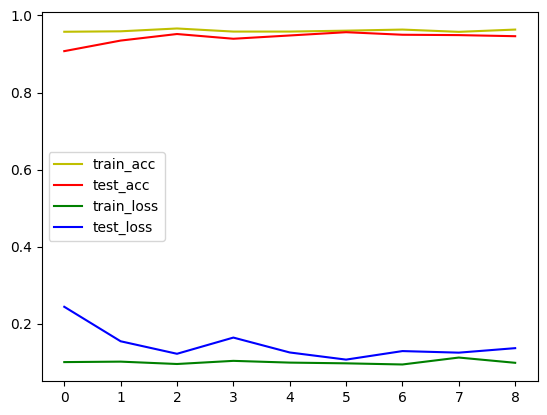

In [34]:
plt.plot(history.history['accuracy'],'y')
plt.plot(history.history['val_accuracy'],'r')
plt.plot(history.history['loss'],'g')
plt.plot(history.history['val_loss'],'b')
plt.legend(['train_acc', 'test_acc','train_loss', 'test_loss'], loc='center left')
plt.show()
